# **[1] Preprocessing**

## **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **Loading Dataset**

In [2]:
try:
    data = pd.read_csv('Water_Data.csv')
except FileNotFoundError:
    print("Error: 'Water_Data.csv' not found. Please upload the file to your environment.")
    exit()

## **Overview of dataset**

In [3]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.830976,190.799044,7695.063935,4.845205,292.515825,507.445488,15.526658,85.009506,4.588785,No
1,4.430281,139.685759,28862.257170,8.961372,298.379458,434.781267,17.299294,63.042501,4.384565,No
2,7.240740,201.186804,23783.099560,7.751285,340.983683,579.220394,13.486379,62.650236,3.556297,No
3,NaN,260.205360,19517.724800,8.764169,368.821037,251.020899,12.804588,48.651890,3.665522,No
4,6.867301,174.184976,24112.153470,5.529942,297.655575,484.122939,11.482687,65.304414,3.823595,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3318 entries, 0 to 3317
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2821 non-null   float64
 1   Hardness         3318 non-null   float64
 2   Solids           3317 non-null   float64
 3   Chloramines      3318 non-null   float64
 4   Sulfate          2524 non-null   float64
 5   Conductivity     3318 non-null   float64
 6   Organic_carbon   3318 non-null   float64
 7   Trihalomethanes  3152 non-null   float64
 8   Turbidity        3318 non-null   float64
 9   Potability       3318 non-null   object 
dtypes: float64(9), object(1)
memory usage: 259.3+ KB


In [5]:
data.isnull().sum()

ph                 497
Hardness             0
Solids               1
Chloramines          0
Sulfate            794
Conductivity         0
Organic_carbon       0
Trihalomethanes    166
Turbidity            0
Potability           0
dtype: int64

## **Encoding**

In [6]:
data['Potability'].replace({'No':0, 'Yes':1}, inplace=True)

## **Null Dropping**

In [7]:
data = data.dropna()

## **Dropping duplicates**

In [8]:
data.drop_duplicates(inplace=True)

## **Checking Outliers**

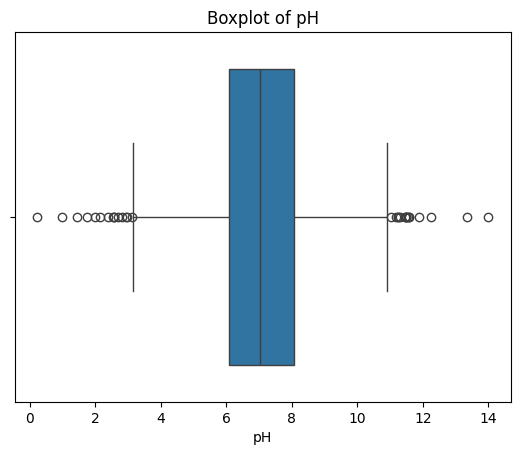

In [9]:
sns.boxplot(x=data['ph'])

plt.title('Boxplot of pH')
plt.xlabel('pH')
plt.show()

In [10]:
cols = ['ph','Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

for i in cols:
    q1 = np.percentile(data[i], 25)
    q3 = np.percentile(data[i], 75)
    norm_range = (q3 - q1) * 1.5

    lower_outliers = data[data[i] < (q1 - norm_range)]

    upper_outliers = data[data[i] > (q3 + norm_range)]

    outliers = len(lower_outliers) + len(upper_outliers)

    print(f"The number of outliers in {i}: {outliers}")

    data[i] = np.where(data[i] < (q1 - norm_range), q1 - norm_range, data[i])
    data[i] = np.where(data[i] > (q3 + norm_range), q3 + norm_range, data[i])

The number of outliers in ph: 31
The number of outliers in Hardness: 49
The number of outliers in Solids: 28
The number of outliers in Chloramines: 43
The number of outliers in Sulfate: 37
The number of outliers in Conductivity: 7
The number of outliers in Organic_carbon: 14
The number of outliers in Trihalomethanes: 22
The number of outliers in Turbidity: 11


## **Data check after preprocessing**

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2011 entries, 0 to 3314
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


## **Scaling Data**

In [12]:
scaler = MinMaxScaler()

In [13]:
cols = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

for col in cols:
  data[[col]] = scaler.fit_transform(data[[col]])

# **[2] Feature Extraction and Selection**

<Axes: >

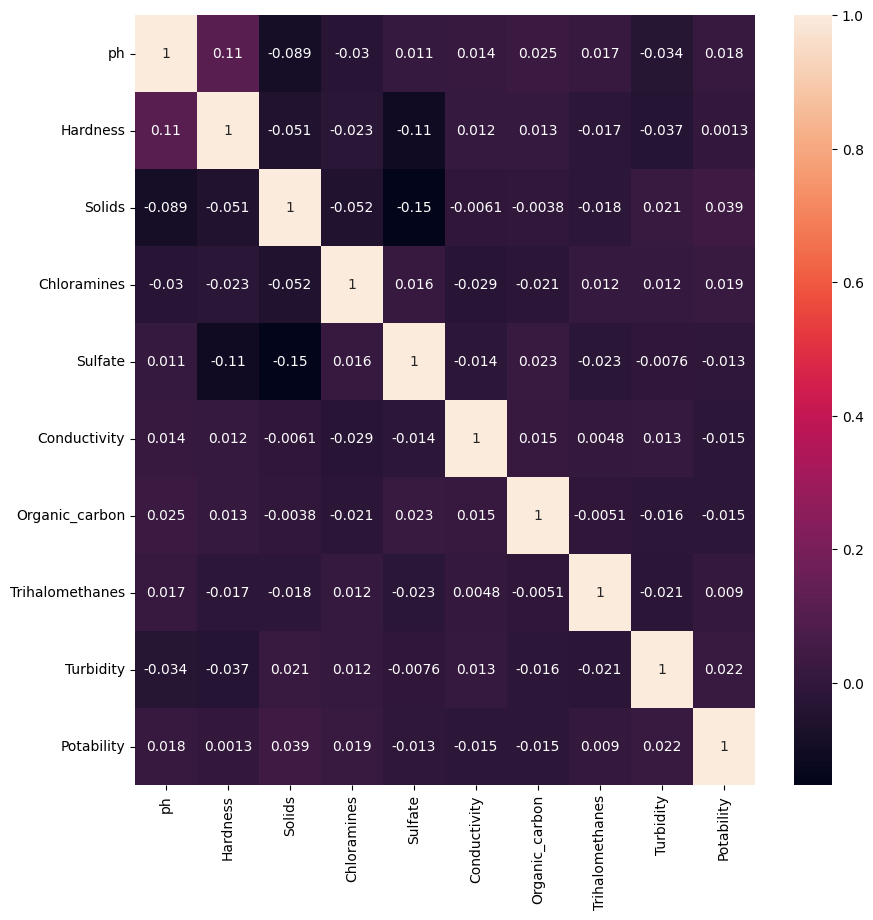

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(),annot = True, ax =ax)

# **[3] Modeling**

## Preparing the data

In [15]:
X=data.drop(['Potability'], axis=1)
Y=data['Potability']

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

## 1) Logistic

In [17]:
# Logistic Regression with GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}  # C is the inverse of regularization strength, Solver: optimization algorithm
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, Y_train)

# Best model
logistic = grid.best_estimator_
yPredLogistic = logistic.predict(X_test)

## 2) SVM

In [18]:
# SVM with GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']} # C is the regularization parameter, gamma: kernel coefficient
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, Y_train)

# Best model
svm = grid.best_estimator_
yPredSVM = svm.predict(X_test)

## 3) KNN

In [19]:
# KNN with GridSearchCV
param_grid = {'n_neighbors': range(3, 25, 2), 'weights': ['uniform', 'distance']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, Y_train)

# Best model
knn = grid.best_estimator_
yPredKNN = knn.predict(X_test)

## 4) Decision Tree

In [20]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],  
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}  

# Perform GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, Y_train)

# Best model
dt = grid.best_estimator_
yPredDT = dt.predict(X_test)

## 5) Random Forest

In [21]:
rf = RandomForestClassifier(
    n_estimators=200,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True,
    random_state=0
)
rf.fit(X_train, Y_train)
yPredRF = rf.predict(X_test)

# **[4] Models Evaluation**

## 1) Logistic Regression

In [22]:
logAcc = accuracy_score(Y_test, yPredLogistic)
print("Logistic Regression Accuracy:", round(logAcc * 100, 2), "%")

Logistic Regression Accuracy: 61.42 %


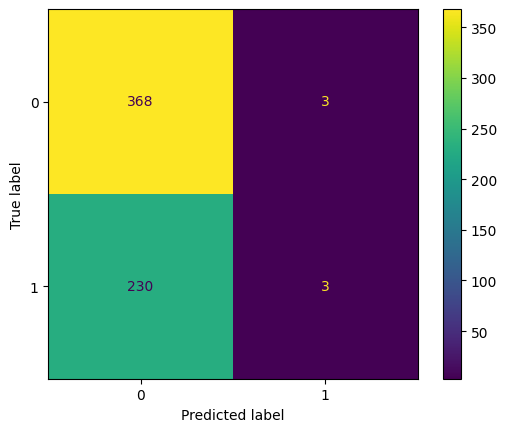

In [23]:
cm = confusion_matrix(Y_test,yPredLogistic)
cmd= ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

In [24]:
print(classification_report(Y_test, yPredLogistic))

              precision    recall  f1-score   support

           0       0.62      0.99      0.76       371
           1       0.50      0.01      0.03       233

    accuracy                           0.61       604
   macro avg       0.56      0.50      0.39       604
weighted avg       0.57      0.61      0.48       604



## 2) SVM

In [25]:
svmAcc = accuracy_score(Y_test, yPredSVM)
print("SVM Accuracy:", round(svmAcc * 100, 2), "%")


SVM Accuracy: 68.71 %


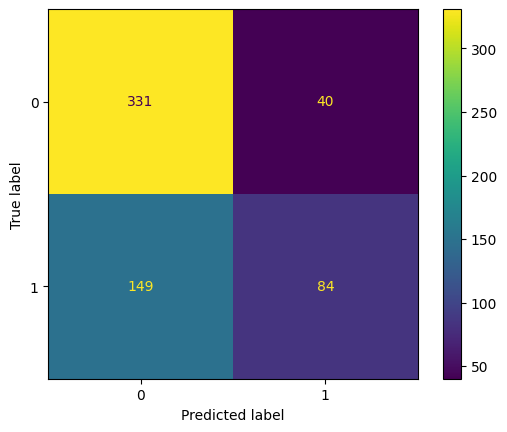

In [26]:
cm = confusion_matrix(Y_test, yPredSVM)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

In [27]:
print(classification_report(Y_test, yPredSVM))

              precision    recall  f1-score   support

           0       0.69      0.89      0.78       371
           1       0.68      0.36      0.47       233

    accuracy                           0.69       604
   macro avg       0.68      0.63      0.62       604
weighted avg       0.68      0.69      0.66       604



## 3) KNN

In [28]:
knnAcc = accuracy_score(Y_test, yPredKNN)
print("KNN Accuracy:", round(knnAcc * 100, 2), '%')

KNN Accuracy: 65.89 %


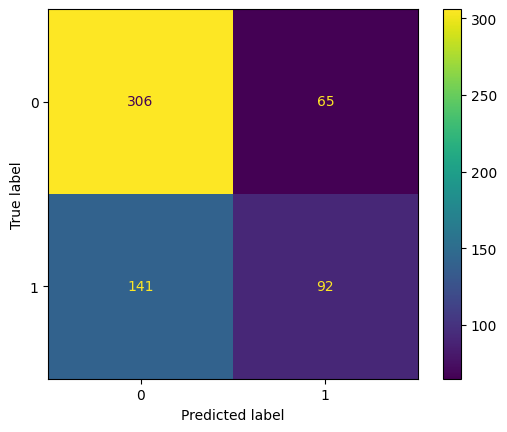

In [29]:
cm = confusion_matrix(Y_test, yPredKNN)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

In [30]:
print(classification_report(Y_test, yPredKNN))

              precision    recall  f1-score   support

           0       0.68      0.82      0.75       371
           1       0.59      0.39      0.47       233

    accuracy                           0.66       604
   macro avg       0.64      0.61      0.61       604
weighted avg       0.65      0.66      0.64       604



## 4) Decision Tree

In [31]:
dtAcc = accuracy_score(Y_test, yPredDT)
print("Decision Tree Accuracy:", round(dtAcc * 100, 2), '%')

Decision Tree Accuracy: 65.4 %


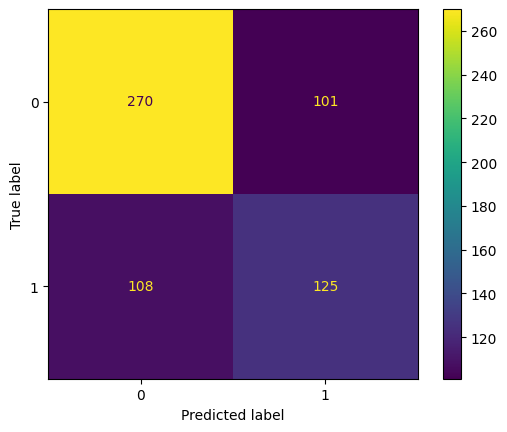

In [32]:
cm = confusion_matrix(Y_test, yPredDT)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

In [33]:
print(classification_report(Y_test, yPredDT))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       371
           1       0.55      0.54      0.54       233

    accuracy                           0.65       604
   macro avg       0.63      0.63      0.63       604
weighted avg       0.65      0.65      0.65       604



## 5) Random Forest

In [34]:
rf_acc = accuracy_score(Y_test, yPredRF)
print("Best Random Forest Accuracy:", round(rf_acc * 100, 2), "%")

Best Random Forest Accuracy: 69.04 %


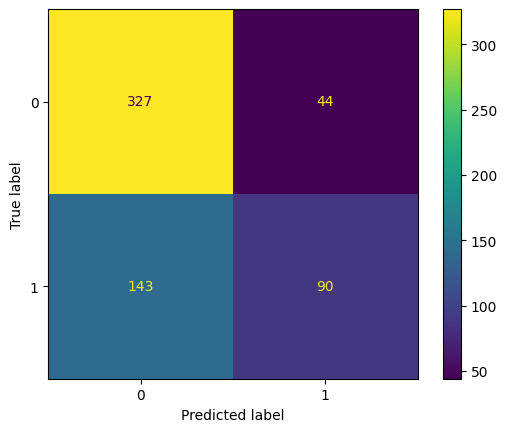

In [35]:
cm = confusion_matrix(Y_test, yPredRF)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

In [36]:
print(classification_report(Y_test,yPredRF))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78       371
           1       0.67      0.39      0.49       233

    accuracy                           0.69       604
   macro avg       0.68      0.63      0.63       604
weighted avg       0.69      0.69      0.67       604



# **[5] Model Deployment**

In [37]:
import pickle

# Save each trained model to the 'models' folder
with open('models/logistic_regression.pkl', 'wb') as f:
    pickle.dump(logistic, f)
with open('models/svm.pkl', 'wb') as f:
    pickle.dump(svm, f)
with open('models/knn.pkl', 'wb') as f:
    pickle.dump(knn, f)
with open('models/decision_tree.pkl', 'wb') as f:
    pickle.dump(dt, f)
with open('models/random_forest.pkl', 'wb') as f:
    pickle.dump(rf, f)